In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from stationarizer import simple_auto_stationarize

In [221]:
root = r"C:\Users\mathe\Documents\Stanford\Stats 207\Final Project\granger-casusality-agro\Data"

In [320]:
fires_national = pd.read_csv(root + "/n_fires_time_series_national.csv")
precipitation = pd.read_csv(root + "/precipitation.csv").iloc[:, 1:]
temperature = pd.read_csv(root + "/temperature.csv").iloc[:, 1:]
commodities = pd.read_csv(root + "/commodities_prices.csv").iloc[:,1:]
commodities_futures = pd.read_csv(root + "/commodities_prices_futures.csv").iloc[:,1:]

In [321]:
fires_national = fires_national[fires_national.date < '2022-01-01']

In [224]:
# Make Fires dataset stationary

In [323]:
fires_national['date'] = pd.to_datetime(fires_national['date'])
fires_national = fires_national.set_index('date')
precipitation = precipitation.sort_values('date').set_index('date')
temperature = temperature.sort_values('date').set_index('date')
commodities = commodities.rename(columns = {'DATE':'date'}).sort_values('date').set_index('date')
commodities_futures = commodities_futures.sort_values('Date').set_index('Date')

## Decomposition

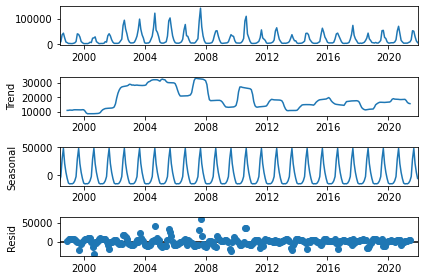

In [226]:
decompose_result = seasonal_decompose(fires_national, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

## Stationarity Tests

### Fires

In [227]:
dftest = adfuller(fires_national['fires'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.7950815379157974
2. P-Value :  0.05897977728289764
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 270
5. Critical Values :
	 1% :  -3.4548039258751206
	 5% :  -2.872304928618605
	 10% :  -2.5725063100137175


<ipython-input-228-e570a069381e>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot()


<AxesSubplot:title={'center':'original'}, xlabel='date'>

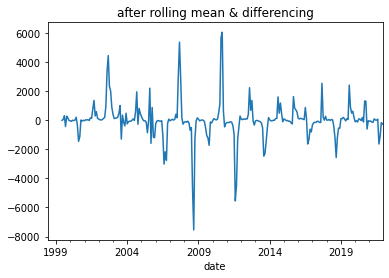

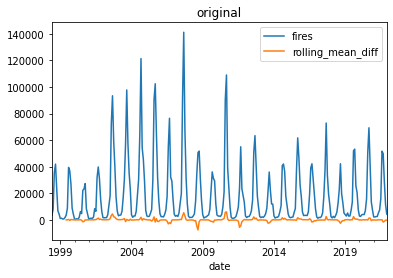

In [228]:
rolling_mean = fires_national['fires'].rolling(window = 12).mean()
fires_national['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
fires_national['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
fires_national.plot(title='original')

In [193]:
dftest = adfuller(fires_national['rolling_mean_diff'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.292485010281268
2. P-Value :  5.675370400566444e-06
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 258
5. Critical Values :
	 1% :  -3.455952927706342
	 5% :  -2.8728086526320302
	 10% :  -2.572774990685656


### Exogenous Regressors

#### Precipitation

<ipython-input-229-d71cb2723ff8>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot()


<AxesSubplot:title={'center':'original'}, xlabel='date'>

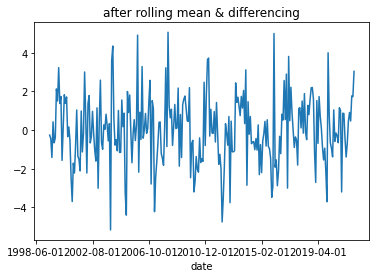

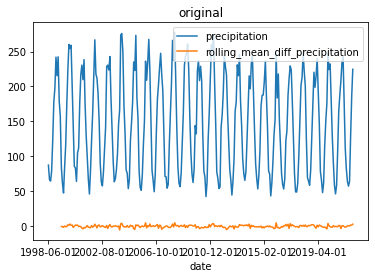

In [229]:
rolling_mean = precipitation['precipitation'].rolling(window = 12).mean()
precipitation['rolling_mean_diff_precipitation'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
precipitation['rolling_mean_diff_precipitation'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
precipitation.plot(title='original')

In [230]:
dftest = adfuller(precipitation['precipitation'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.565436969837964
2. P-Value :  0.10035319897725159
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 268
5. Critical Values :
	 1% :  -3.454988209954765
	 5% :  -2.8723857312734613
	 10% :  -2.572549407997327


In [231]:
dftest = adfuller(precipitation['rolling_mean_diff_precipitation'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.77857746745885
2. P-Value :  8.537457141012916e-12
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 259
5. Critical Values :
	 1% :  -3.4558530692911504
	 5% :  -2.872764881778665
	 10% :  -2.572751643088207


#### Temperature

<AxesSubplot:xlabel='date'>

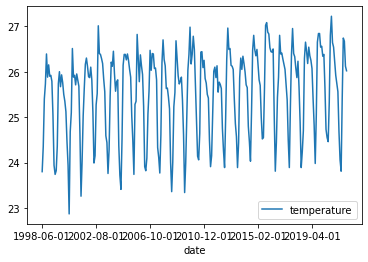

In [232]:
temperature.plot()

<ipython-input-233-9c3a8d449554>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot()


<AxesSubplot:title={'center':'original'}, xlabel='date'>

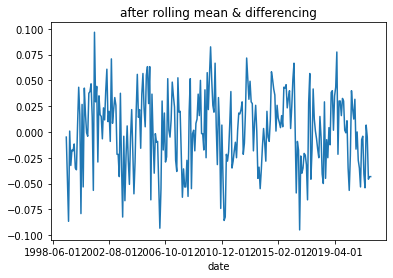

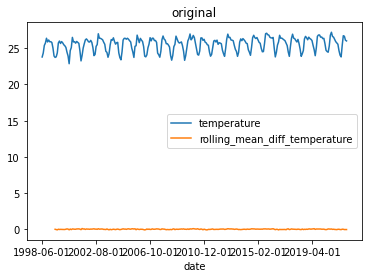

In [233]:
rolling_mean = temperature['temperature'].rolling(window = 12).mean()
temperature['rolling_mean_diff_temperature'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
temperature['rolling_mean_diff_temperature'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
temperature.plot(title='original')

In [234]:
dftest = adfuller(temperature['temperature'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.214821828081849
2. P-Value :  0.019142605077569434
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 267
5. Critical Values :
	 1% :  -3.4550813975770827
	 5% :  -2.8724265892710914
	 10% :  -2.5725712007462582


In [235]:
dftest = adfuller(temperature['rolling_mean_diff_temperature'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.566806497419163
2. P-Value :  1.4983149393645232e-06
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 258
5. Critical Values :
	 1% :  -3.455952927706342
	 5% :  -2.8728086526320302
	 10% :  -2.572774990685656


#### Commodities

<AxesSubplot:xlabel='date'>

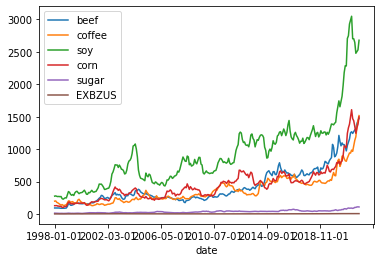

In [296]:
commodities.plot()

In [299]:
stationarized_df = simple_auto_stationarize(commodities)

C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is small

In [297]:
dftest = adfuller(commodities['beef'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  2.5864332622086432
2. P-Value :  0.9990725223527035
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 276
5. Critical Values :
	 1% :  -3.4542672521624214
	 5% :  -2.87206958769775
	 10% :  -2.5723807881747534


In [298]:
dftest = adfuller(stationarized_df['beef'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.9952349521988335
2. P-Value :  0.03534179834973348
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 276
5. Critical Values :
	 1% :  -3.4542672521624214
	 5% :  -2.87206958769775
	 10% :  -2.5723807881747534


In [300]:
dftest = adfuller(commodities['coffee'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  3.2948604946989035
2. P-Value :  1.0
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 283
5. Critical Values :
	 1% :  -3.453670163592738
	 5% :  -2.8718077069772248
	 10% :  -2.5722411158835796


In [302]:
dftest = adfuller(stationarized_df['coffee'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.801886844882596
2. P-Value :  0.0028880689913393246
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 282
5. Critical Values :
	 1% :  -3.4537536300652
	 5% :  -2.8718443180148836
	 10% :  -2.572260641818822


In [304]:
dftest = adfuller(commodities['corn'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  2.0946689595205057
2. P-Value :  0.998784016617892
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 282
5. Critical Values :
	 1% :  -3.4537536300652
	 5% :  -2.8718443180148836
	 10% :  -2.572260641818822


In [305]:
dftest = adfuller(stationarized_df['corn'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.921180113292256
2. P-Value :  3.7206677731688076e-12
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 282
5. Critical Values :
	 1% :  -3.4537536300652
	 5% :  -2.8718443180148836
	 10% :  -2.572260641818822


In [306]:
dftest = adfuller(commodities['sugar'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.41981705206359526
2. P-Value :  0.982221090970242
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 275
5. Critical Values :
	 1% :  -3.454355055831705
	 5% :  -2.8721080938842976
	 10% :  -2.572401325619835


In [307]:
dftest = adfuller(stationarized_df['sugar'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.5586818164137703
2. P-Value :  0.006601886259446885
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 275
5. Critical Values :
	 1% :  -3.454355055831705
	 5% :  -2.8721080938842976
	 10% :  -2.572401325619835


In [308]:
dftest = adfuller(commodities['soy'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  1.9218553778089402
2. P-Value :  0.9985623814610531
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 279
5. Critical Values :
	 1% :  -3.4540076534999957
	 5% :  -2.8719557347997178
	 10% :  -2.5723200648758366


In [309]:
dftest = adfuller(stationarized_df['soy'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.473994917236528
2. P-Value :  0.00021904633275783092
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 276
5. Critical Values :
	 1% :  -3.4542672521624214
	 5% :  -2.87206958769775
	 10% :  -2.5723807881747534


<AxesSubplot:xlabel='date'>

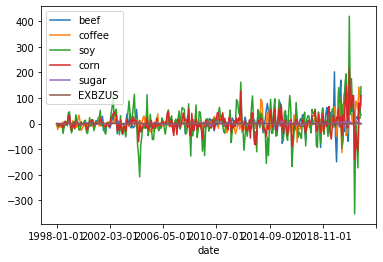

In [310]:
stationarized_df.plot()

In [311]:
stationarized_df.to_csv(r"C:\Users\mathe\Documents\Stanford\Stats 207\Final Project\granger-casusality-agro\Data\commodities_stationarized.csv")

### Commodities Futures

<AxesSubplot:xlabel='Date'>

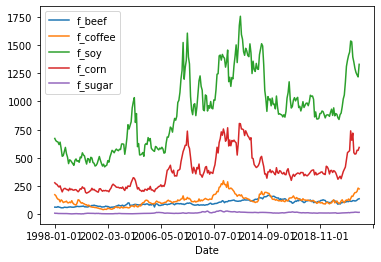

In [325]:
commodities_futures.plot()

In [326]:
stationarized_futures_df = simple_auto_stationarize(commodities_futures)

C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is small

<AxesSubplot:xlabel='Date'>

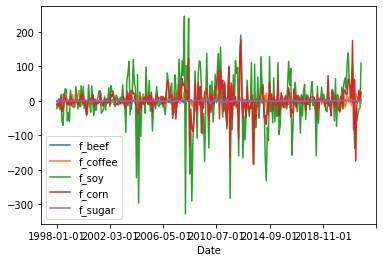

In [327]:
stationarized_futures_df.plot()

In [328]:
dftest = adfuller(commodities_futures['f_beef'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.6193234887735295
2. P-Value :  0.4730839847290478
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 275
5. Critical Values :
	 1% :  -3.454355055831705
	 5% :  -2.8721080938842976
	 10% :  -2.572401325619835


In [329]:
dftest = adfuller(stationarized_futures_df['f_beef'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.07166850455032
2. P-Value :  0.001078397015473155
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 275
5. Critical Values :
	 1% :  -3.454355055831705
	 5% :  -2.8721080938842976
	 10% :  -2.572401325619835


In [330]:
dftest = adfuller(stationarized_futures_df['f_corn'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.987263018434119
2. P-Value :  1.779938188966323e-07
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 274
5. Critical Values :
	 1% :  -3.4544435065994437
	 5% :  -2.8721468827772774
	 10% :  -2.572422013959188


In [331]:
dftest = adfuller(stationarized_futures_df['f_sugar'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.150478815865916
2. P-Value :  1.1087118770175092e-05
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 272
5. Critical Values :
	 1% :  -3.4546223782586534
	 5% :  -2.8722253212300277
	 10% :  -2.5724638500216264


In [332]:
dftest = adfuller(stationarized_futures_df['f_coffee'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.029763113482565
2. P-Value :  6.229061875146483e-10
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 283
5. Critical Values :
	 1% :  -3.453670163592738
	 5% :  -2.8718077069772248
	 10% :  -2.5722411158835796


In [333]:
dftest = adfuller(stationarized_futures_df['f_soy'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.574202498530243
2. P-Value :  2.7894889593216824e-11
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 278
5. Critical Values :
	 1% :  -3.4540935579190495
	 5% :  -2.8719934111688965
	 10% :  -2.5723401594120388


In [334]:
#stationarized_futures_df.to_csv(r"C:\Users\mathe\Documents\Stanford\Stats 207\Final Project\granger-casusality-agro\Data\commodities_stationarized_futures.csv")

## Fit SARIMAX

### With Weather Exogenous Regressors

In [236]:
exogenous_regressors = precipitation.merge(temperature, left_index = True, right_index = True).drop(['precipitation', 'temperature'], axis = 1)

In [249]:
fires_national_ex = fires_national.iloc[12:,:]#['fires']

In [251]:
model=SARIMAX(endog = fires_national_ex['fires'], exog = exogenous_regressors.iloc[12:], order=(0, 0, 0),seasonal_order=(0,1,2,12), trend = "ct")
results=model.fit()

C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<ipython-input-255-4f3829627bfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires_national_ex['forecast']=results.predict(start=30,end=270,dynamic=True)


<AxesSubplot:xlabel='date'>

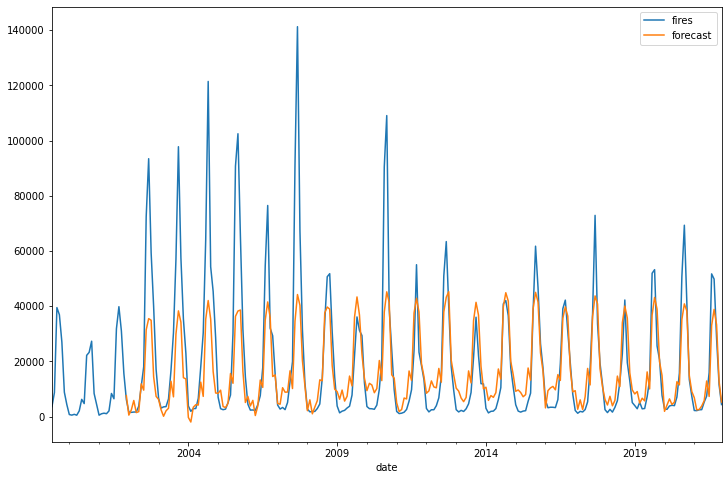

In [255]:
fires_national_ex['forecast']=results.predict(start=30,end=270,dynamic=True)
fires_national_ex[['fires','forecast']].plot(figsize=(12,8))

In [256]:
print(results.summary())

                                   SARIMAX Results                                   
Dep. Variable:                         fires   No. Observations:                  271
Model:             SARIMAX(0, 1, [1, 2], 12)   Log Likelihood               -2816.052
Date:                       Fri, 25 Nov 2022   AIC                           5646.105
Time:                               20:51:46   BIC                           5671.003
Sample:                           06-01-1999   HQIC                          5656.115
                                - 12-01-2021                                         
Covariance Type:                         opg                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                        1501.0012   1595.461      0.941      0.347   -1626.045    4628.047
drift       

### With Weather and Prices Exogenous Regressors

In [338]:
stationarized_df = stationarized_df[]

,beef,coffee,soy,corn,sugar,EXBZUS
date,,,,,,
1998-01-01,-3.285353,0.681352,-2.058167,-2.689740,-1.026661,-0.001385
1998-02-01,-2.976616,-23.835861,-12.252344,-1.747900,-1.140044,-0.002685
1998-03-01,-2.341399,-10.367373,-9.421389,-9.998827,-0.326135,-0.001285
1998-04-01,-4.012861,-14.269089,-2.719881,-2.815381,-0.665205,-0.002185
1998-05-01,-5.844533,-15.497684,-9.683891,-6.837320,-1.449189,-0.001985
...,...,...,...,...,...,...
2021-07-01,26.138654,78.276280,-62.133525,-90.753802,10.100050,0.078815
2021-08-01,15.628572,52.334788,-172.864366,-106.846519,-0.253912,0.021515
2021-09-01,73.716618,143.049044,21.266128,80.218119,6.813566,0.253815


In [339]:
exogenous_regressors = exogenous_regressors.merge(stationarized_df, left_index = True, right_index = True, how = 'left').merge(stationarized_futures_df, left_index = True, right_index = True, how = 'left')
exogenous_regressors = exogenous_regressors.reset_index()[exogenous_regressors.reset_index().date >= '1998-06-01']
exogenous_regressors.set_index('date', inplace = True)

In [357]:
model=SARIMAX(endog = fires_national_ex.iloc[:-1]['fires'], exog = exogenous_regressors.iloc[12:-1], order=(0, 0, 0),seasonal_order=(0,1,2,12), trend = "ct")
results=model.fit()

C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='date'>

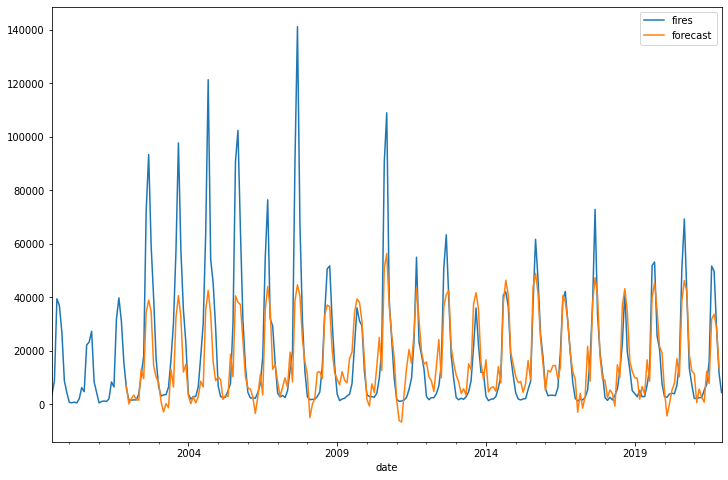

In [364]:
fires_national_ex['forecast']=results.predict(start=30,end=269,dynamic=True)
fires_national_ex[['fires','forecast']].plot(figsize=(12,8))

In [365]:
print(results.summary())

                                   SARIMAX Results                                   
Dep. Variable:                         fires   No. Observations:                  270
Model:             SARIMAX(0, 1, [1, 2], 12)   Log Likelihood               -2795.602
Date:                       Fri, 25 Nov 2022   AIC                           5627.205
Time:                               21:58:35   BIC                           5691.158
Sample:                           06-01-1999   HQIC                          5652.921
                                - 11-01-2021                                         
Covariance Type:                         opg                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                        1461.6716   1717.392      0.851      0.395   -1904.354    4827.697
drift       

### Without Exogenous Regressors

In [169]:
model=SARIMAX(endog = fires_national['fires'], order=(0, 0, 0),seasonal_order=(0,1,2,12), trend = "ct")
results=model.fit()

C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

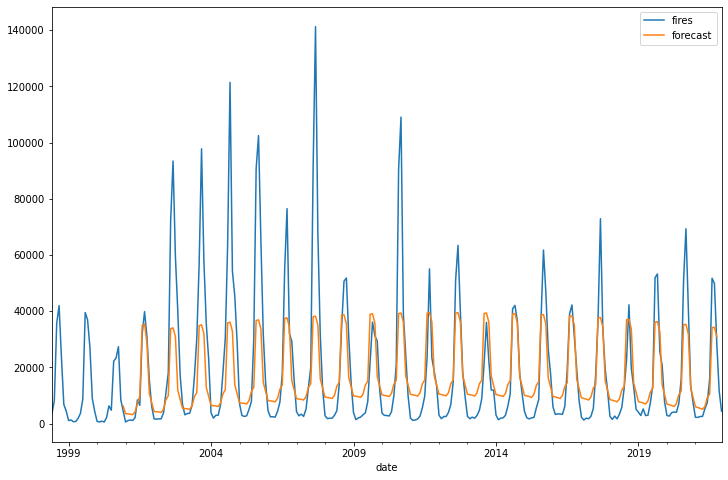

In [170]:
fires_national['forecast']=results.predict(start=30,end=280,dynamic=True)
fires_national[['fires','forecast']].plot(figsize=(12,8))

In [171]:
print(results.summary())

                                   SARIMAX Results                                   
Dep. Variable:                         fires   No. Observations:                  283
Model:             SARIMAX(0, 1, [1, 2], 12)   Log Likelihood               -2948.192
Date:                       Fri, 25 Nov 2022   AIC                           5906.384
Time:                               20:25:47   BIC                           5924.394
Sample:                           06-01-1998   HQIC                          5913.615
                                - 12-01-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1693.0005   1446.240      1.171      0.242   -1141.578    4527.579
drift         -9.8415     11.659     -0.844      0.399     -32.692      13.

In [371]:
fires_national_stationarized = simple_auto_stationarize(fires_national)

C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='date'>

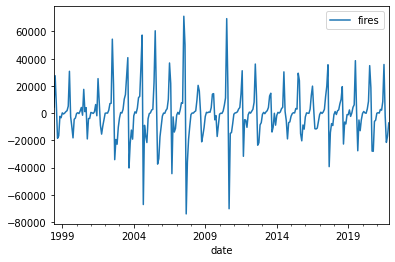

In [372]:
fires_national_stationarized.plot()

In [373]:
dftest = adfuller(fires_national_stationarized['fires'].dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -8.59836456732267
2. P-Value :  6.977153137970088e-14
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 270
5. Critical Values :
	 1% :  -3.4548039258751206
	 5% :  -2.872304928618605
	 10% :  -2.5725063100137175


In [374]:
fires_national_stationarized.to_csv('fires_national_stationarized.csv')

In [378]:
temperature_stat = simple_auto_stationarize(temperature)
precipitation_stat = simple_auto_stationarize(precipitation)

C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [381]:
weather_stat = temperature_stat.merge(precipitation_stat, left_index = True, right_index = True)

In [383]:
weather_stat.to_csv('stat_weather.csv')